# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

**To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the _Materials and Methods_ section of the paper.  How many marketing campaigns does this data represent?**

"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts." _USING DATA MINING FOR BANK DIRECT MARKETING: AN APPLICATION OF THE CRISP-DM METHODOLOGY_ from Sergio Moro, Paulo Cortez, Raul Laureano

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, precision_score
import time
pd.set_option("future.no_silent_downcasting", True)

In [7]:
bankMarketingCampaignDf = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
bankMarketingCampaignDf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [10]:
print("The dataset has " + str(len(bankMarketingCampaignDf)) + " rows")

The dataset has 41188 rows


In [11]:
bankMarketingCampaignDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
# In this cell we show the number of data missing in each column of the dataframe
bankMarketingCampaignDf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
bankMarketingCampaignDf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


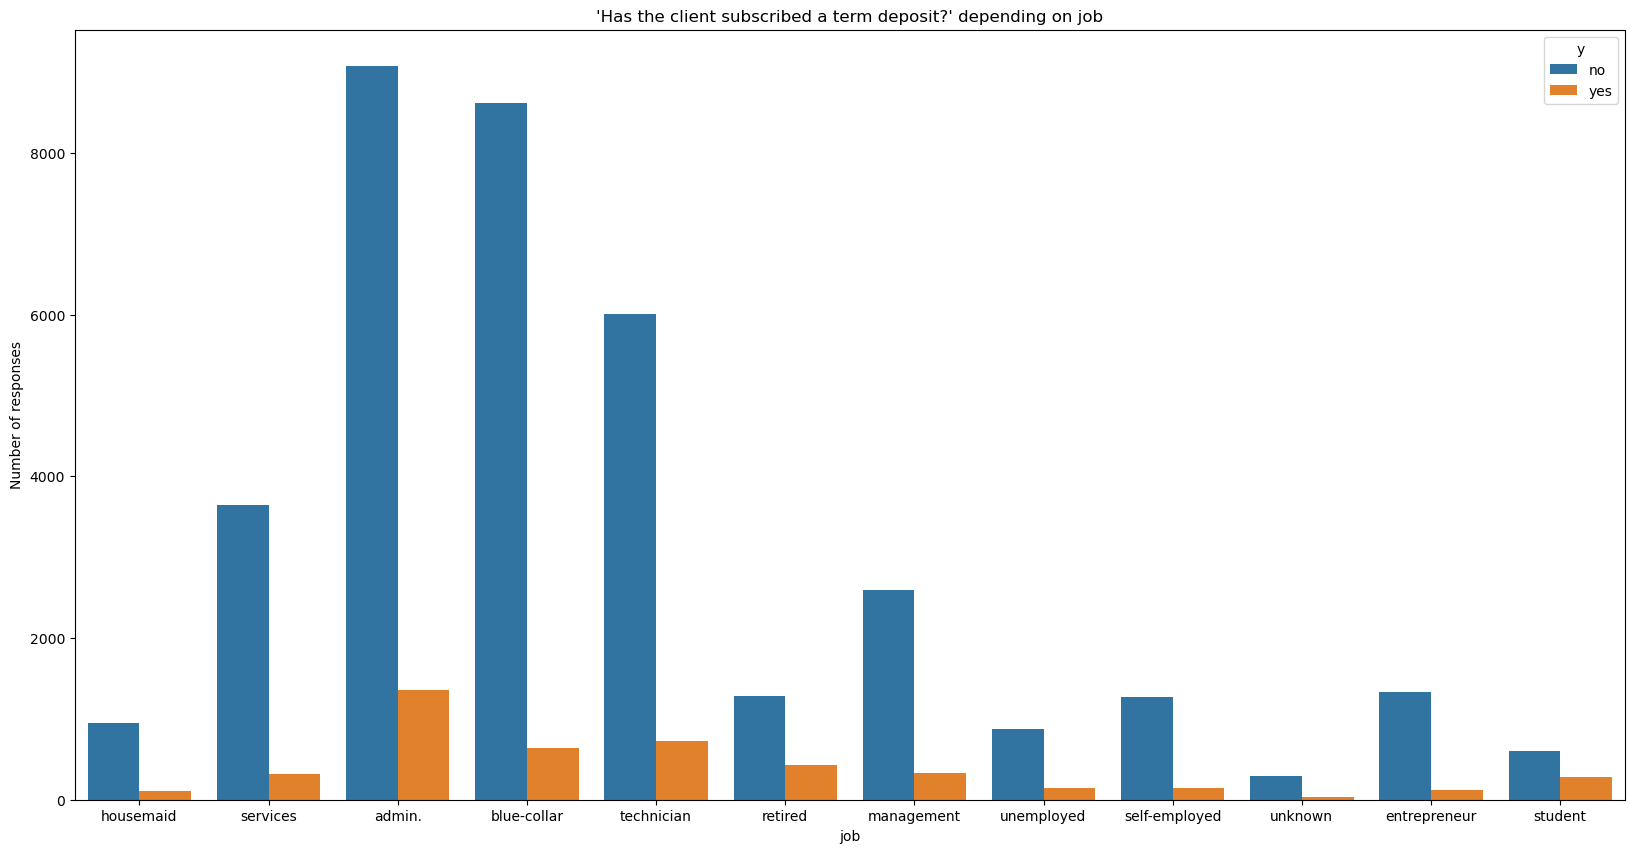

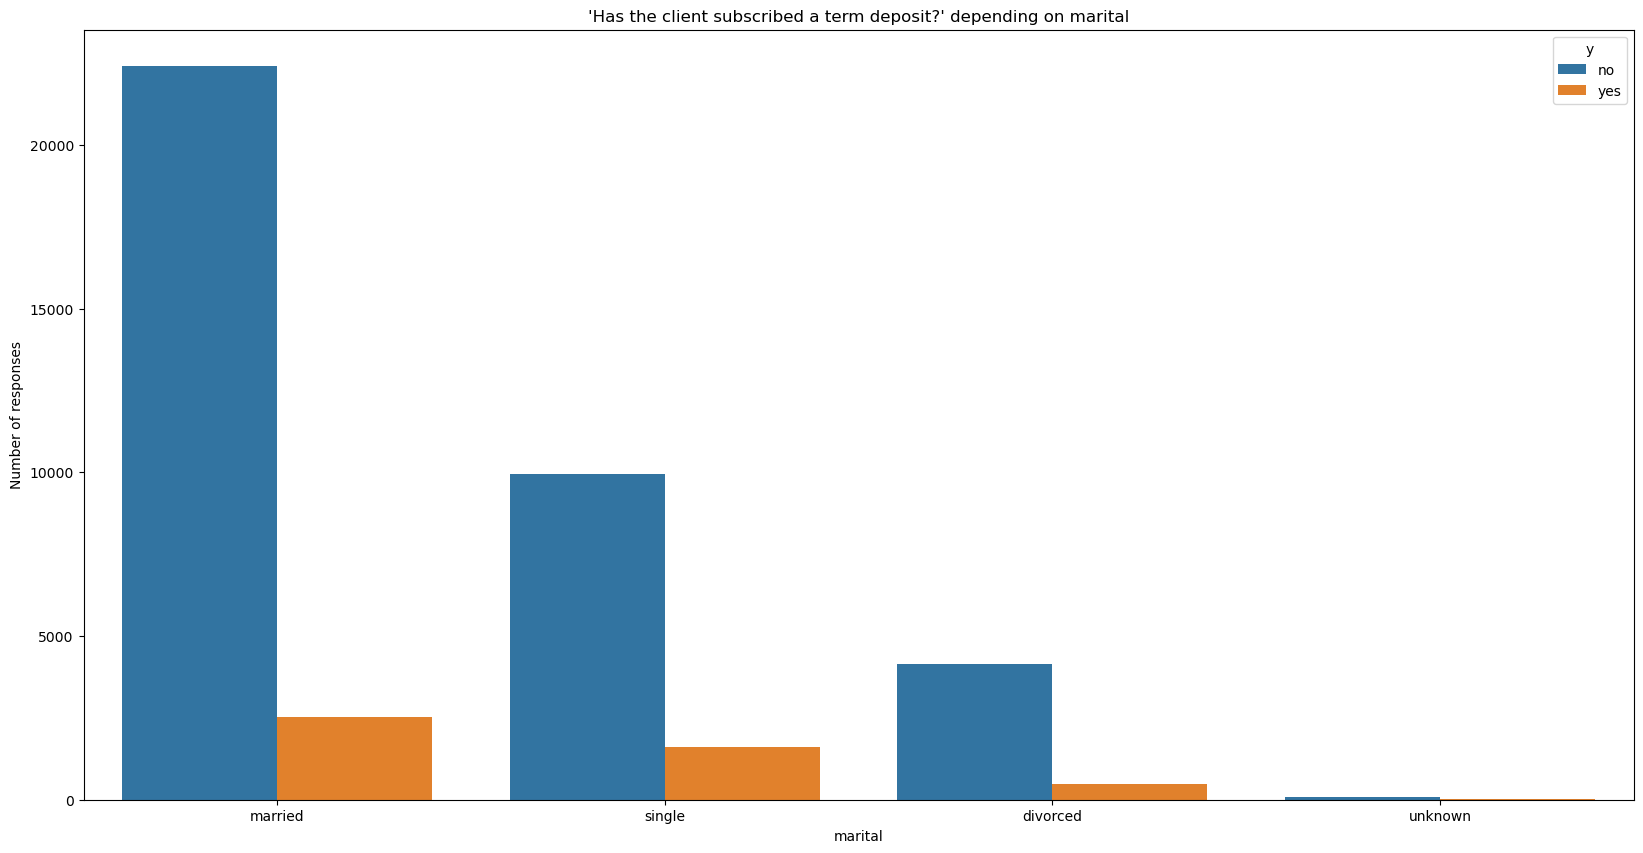

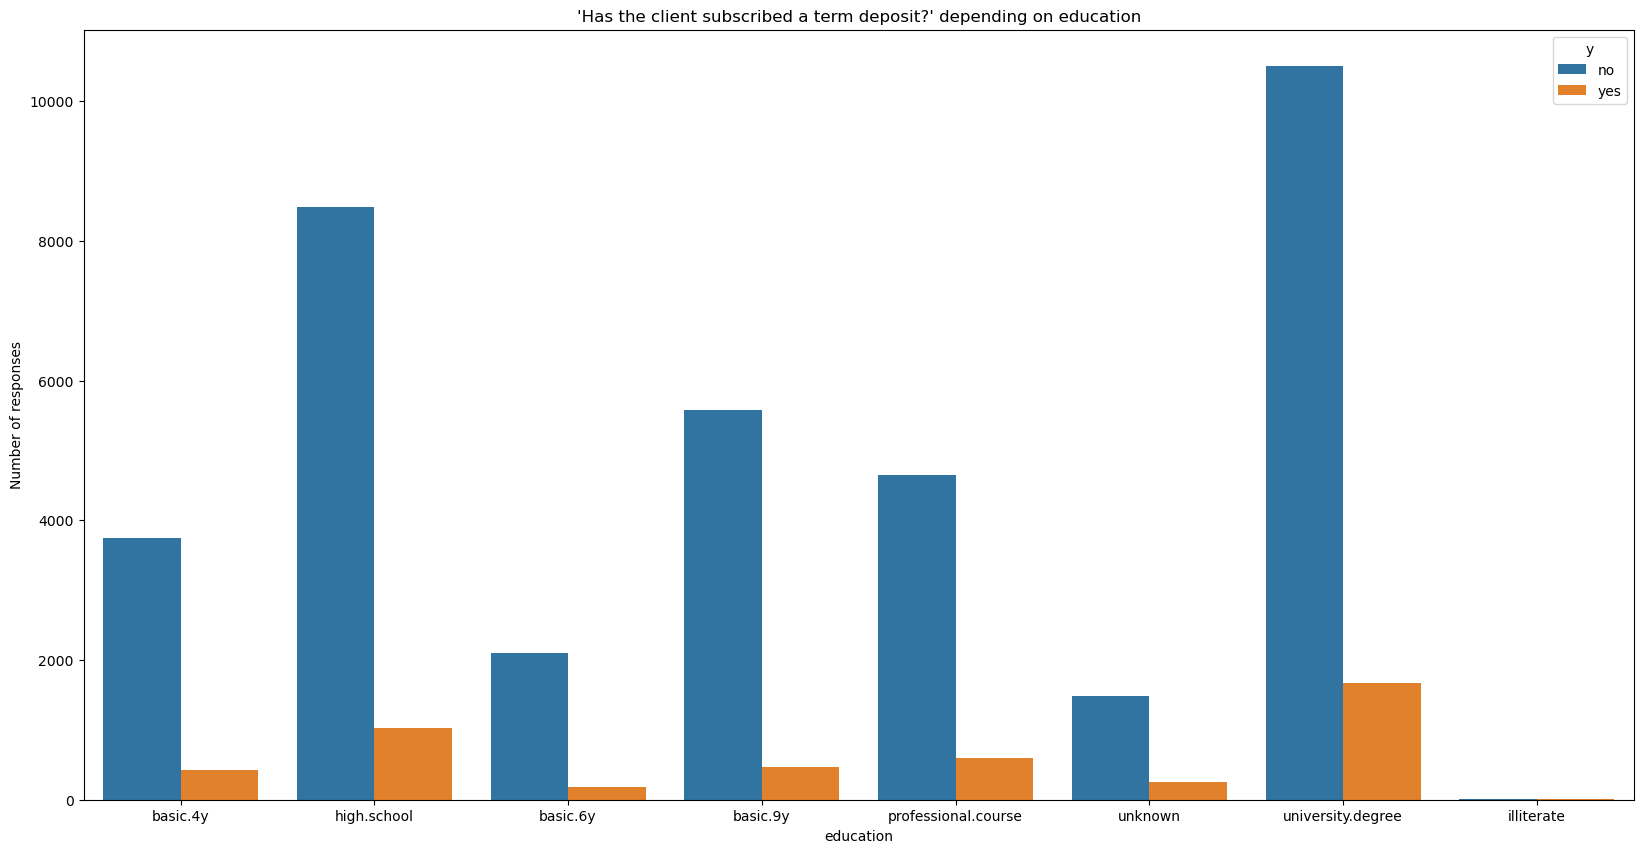

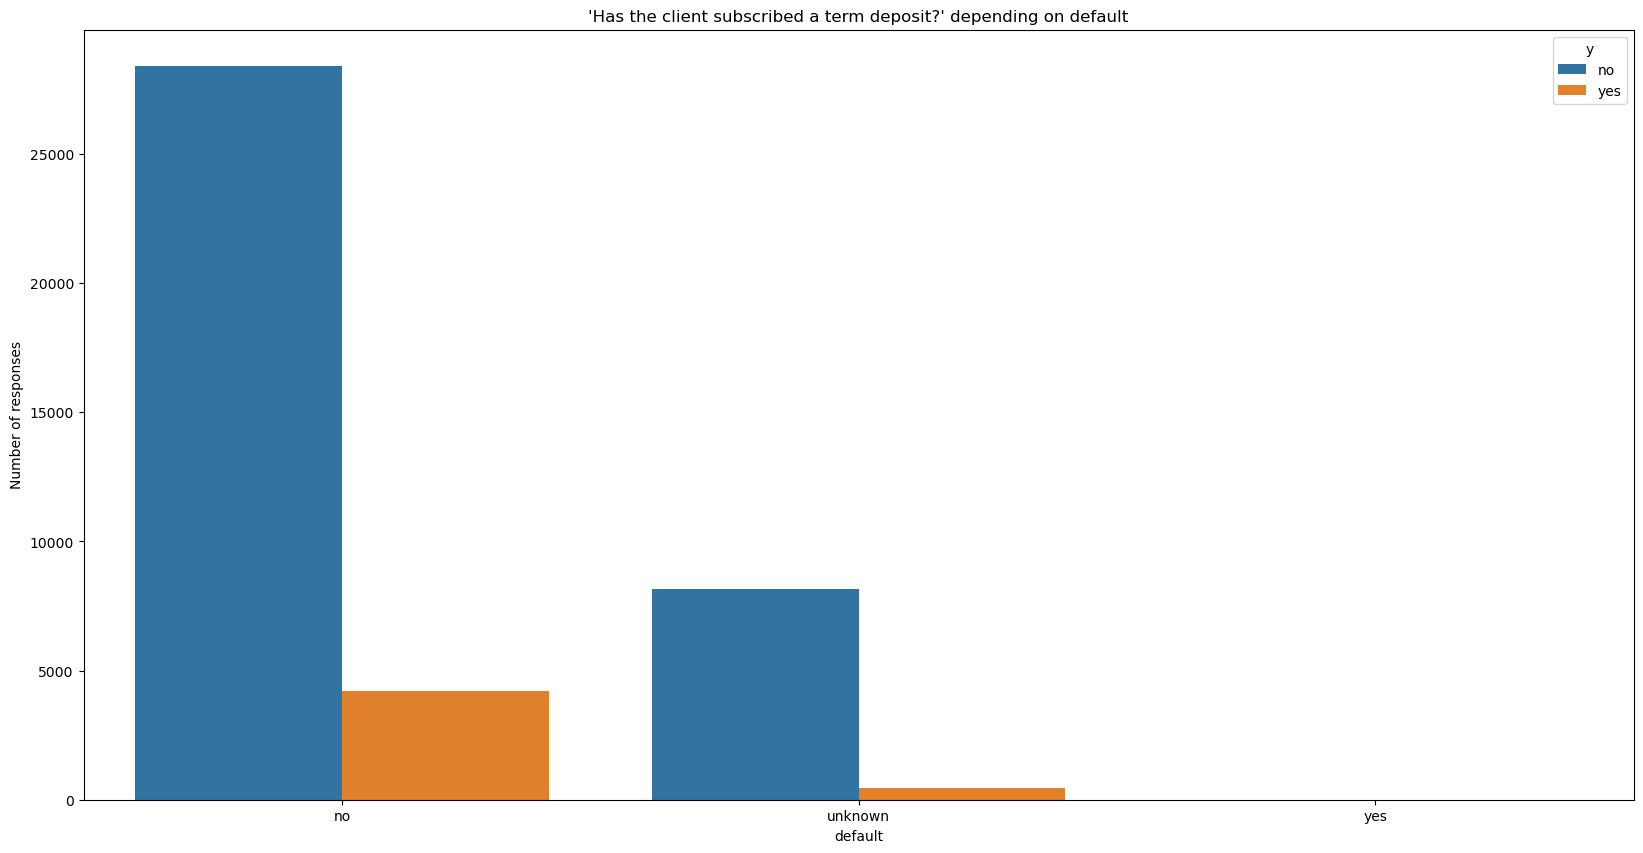

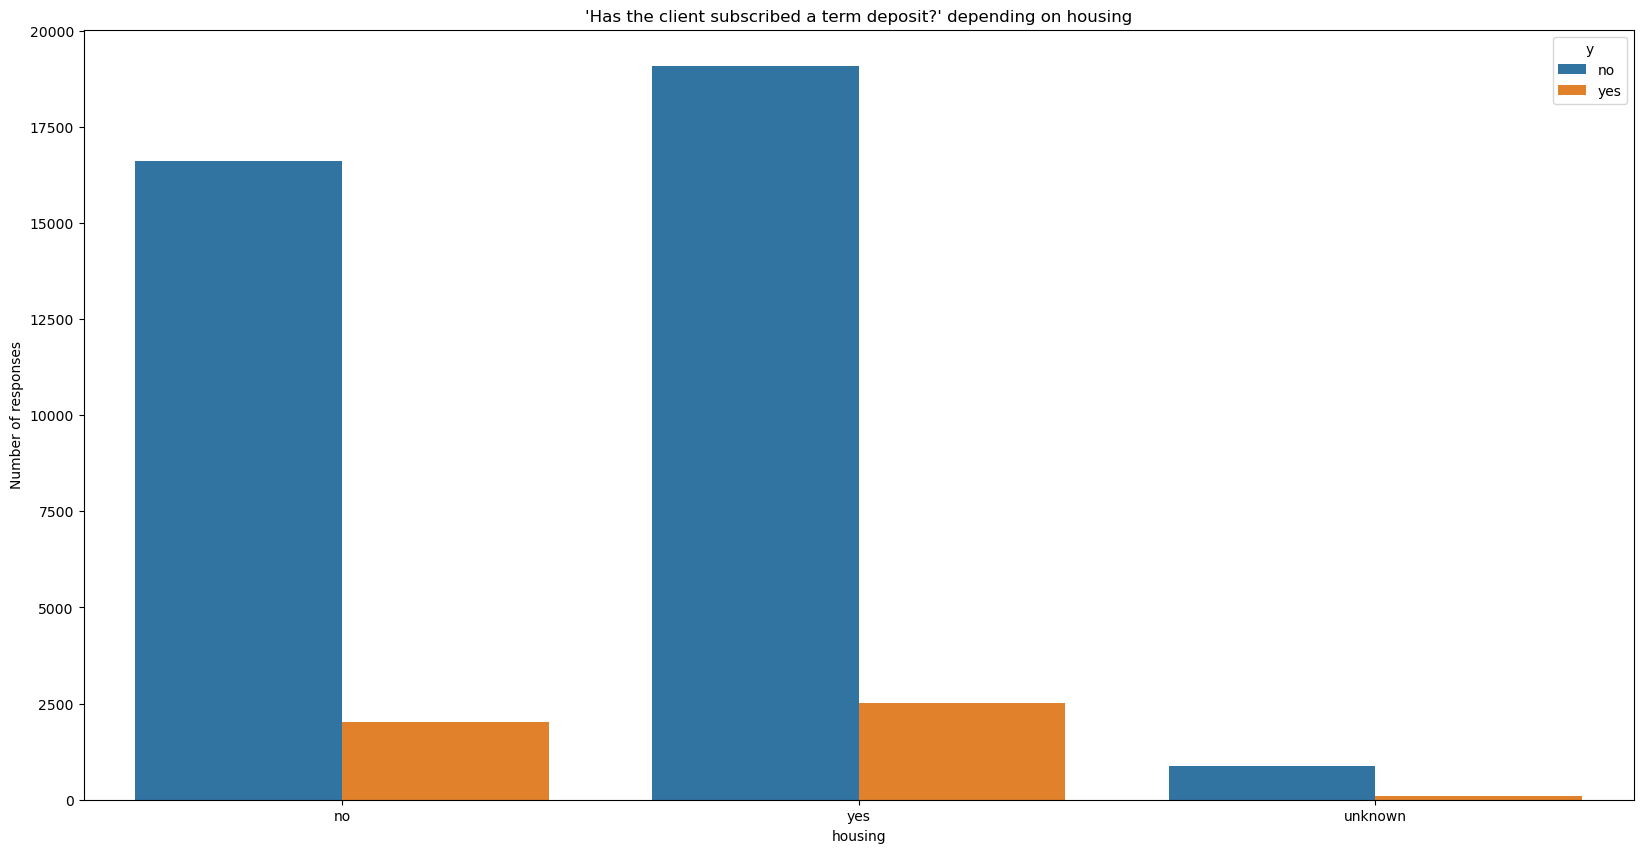

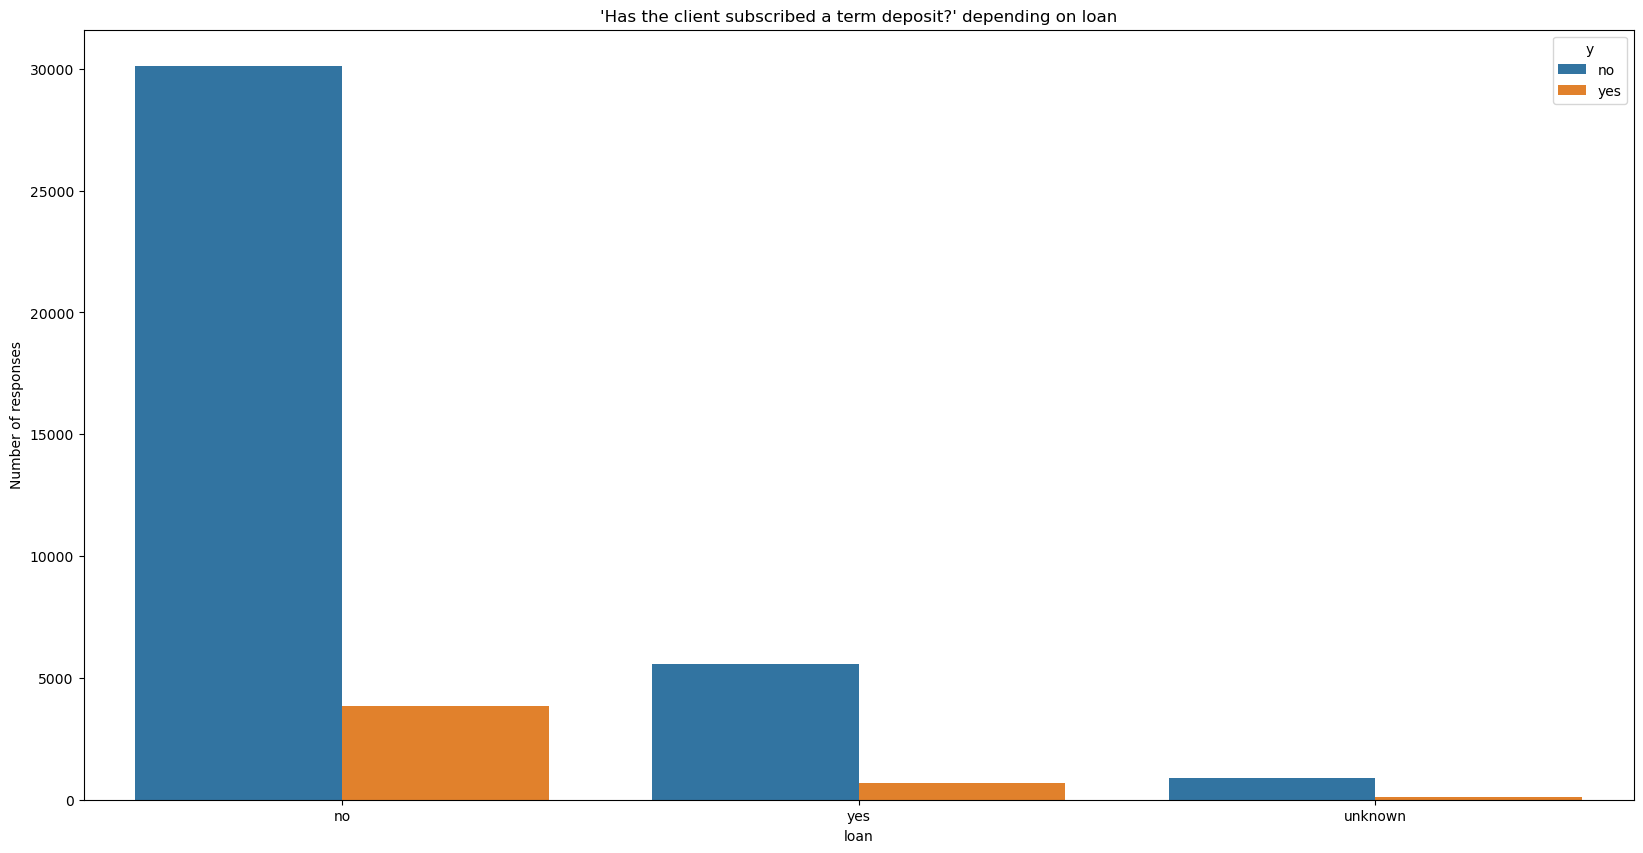

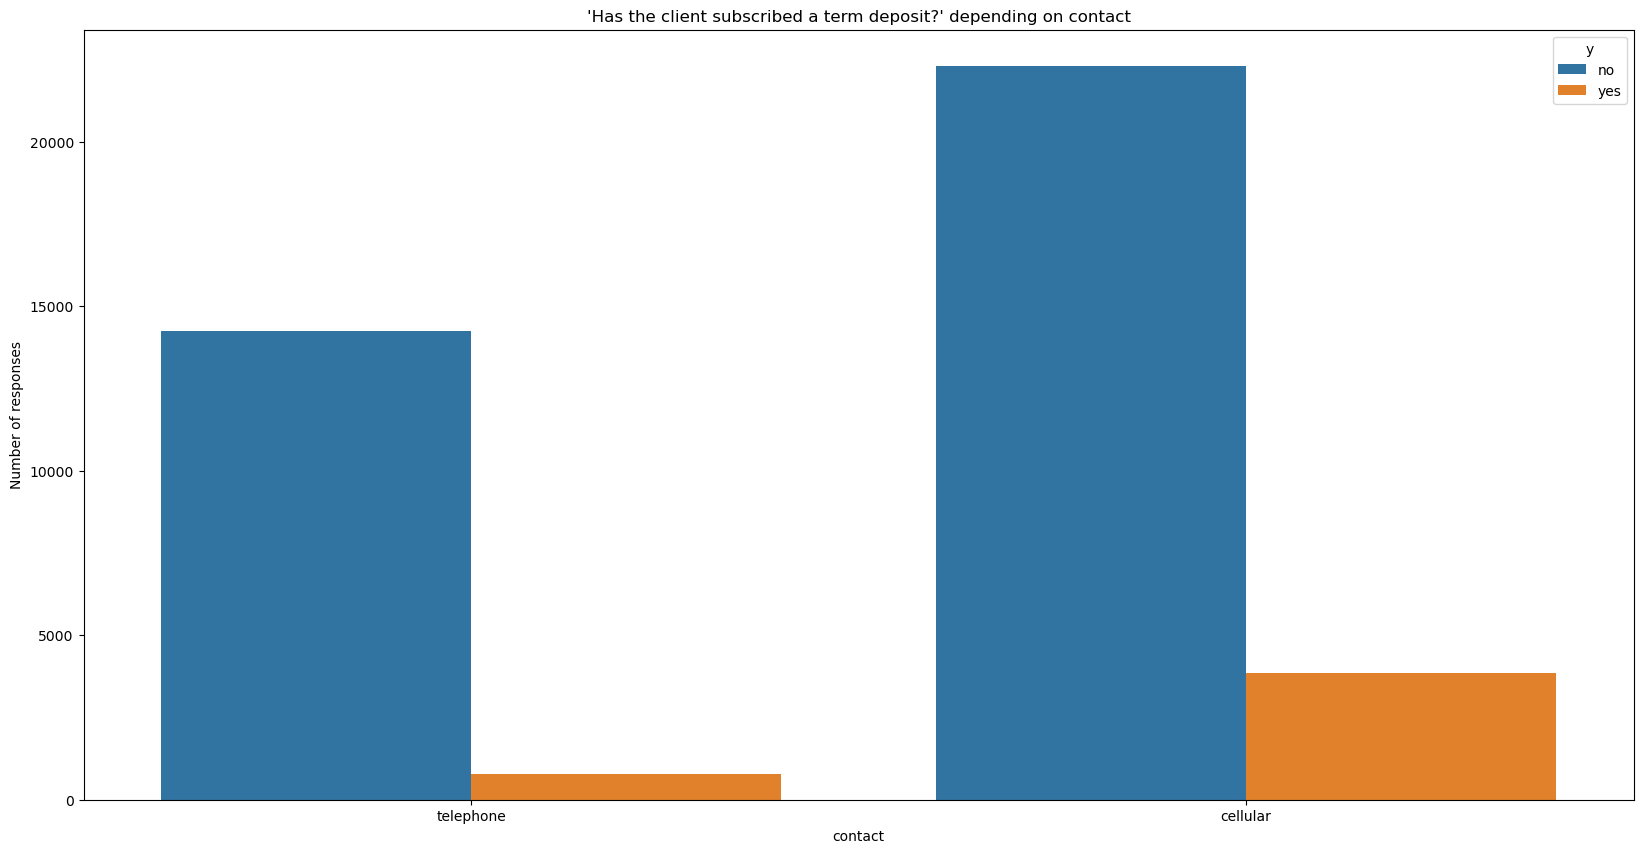

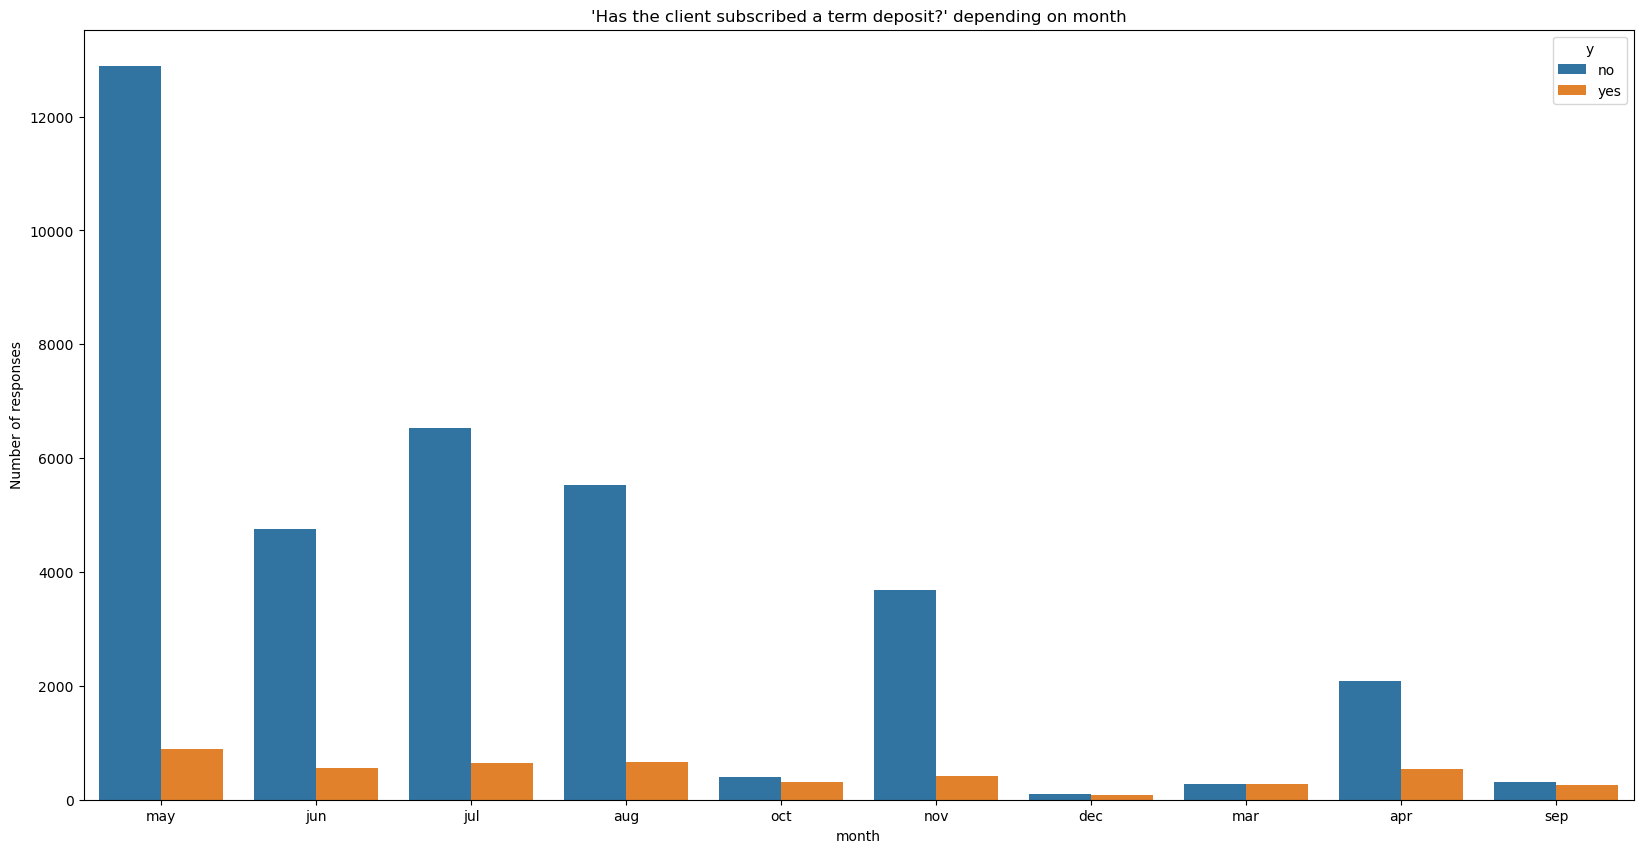

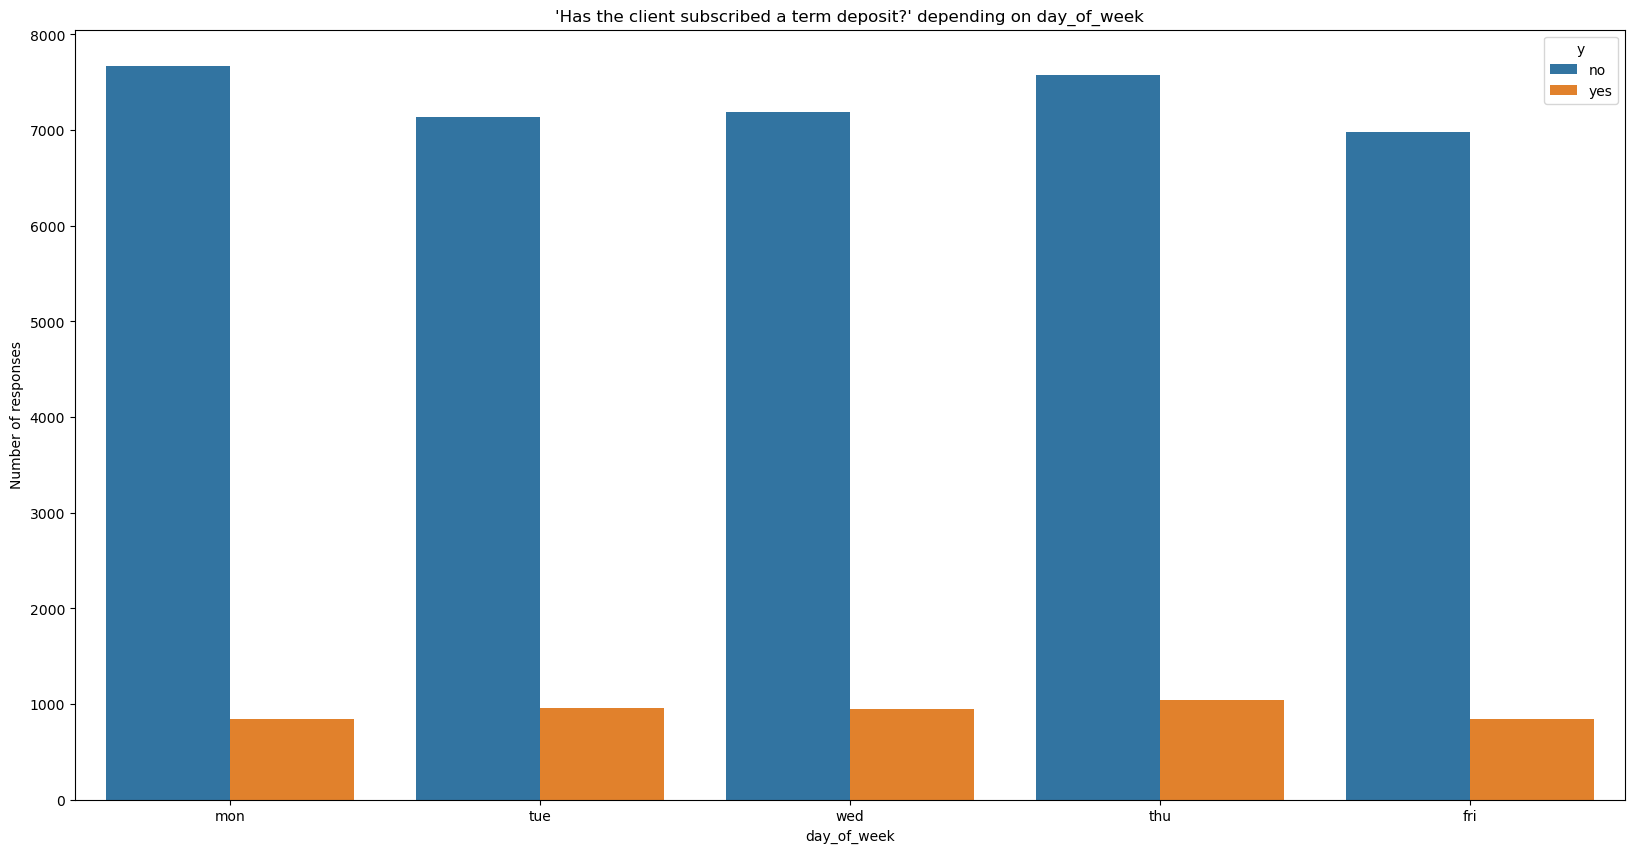

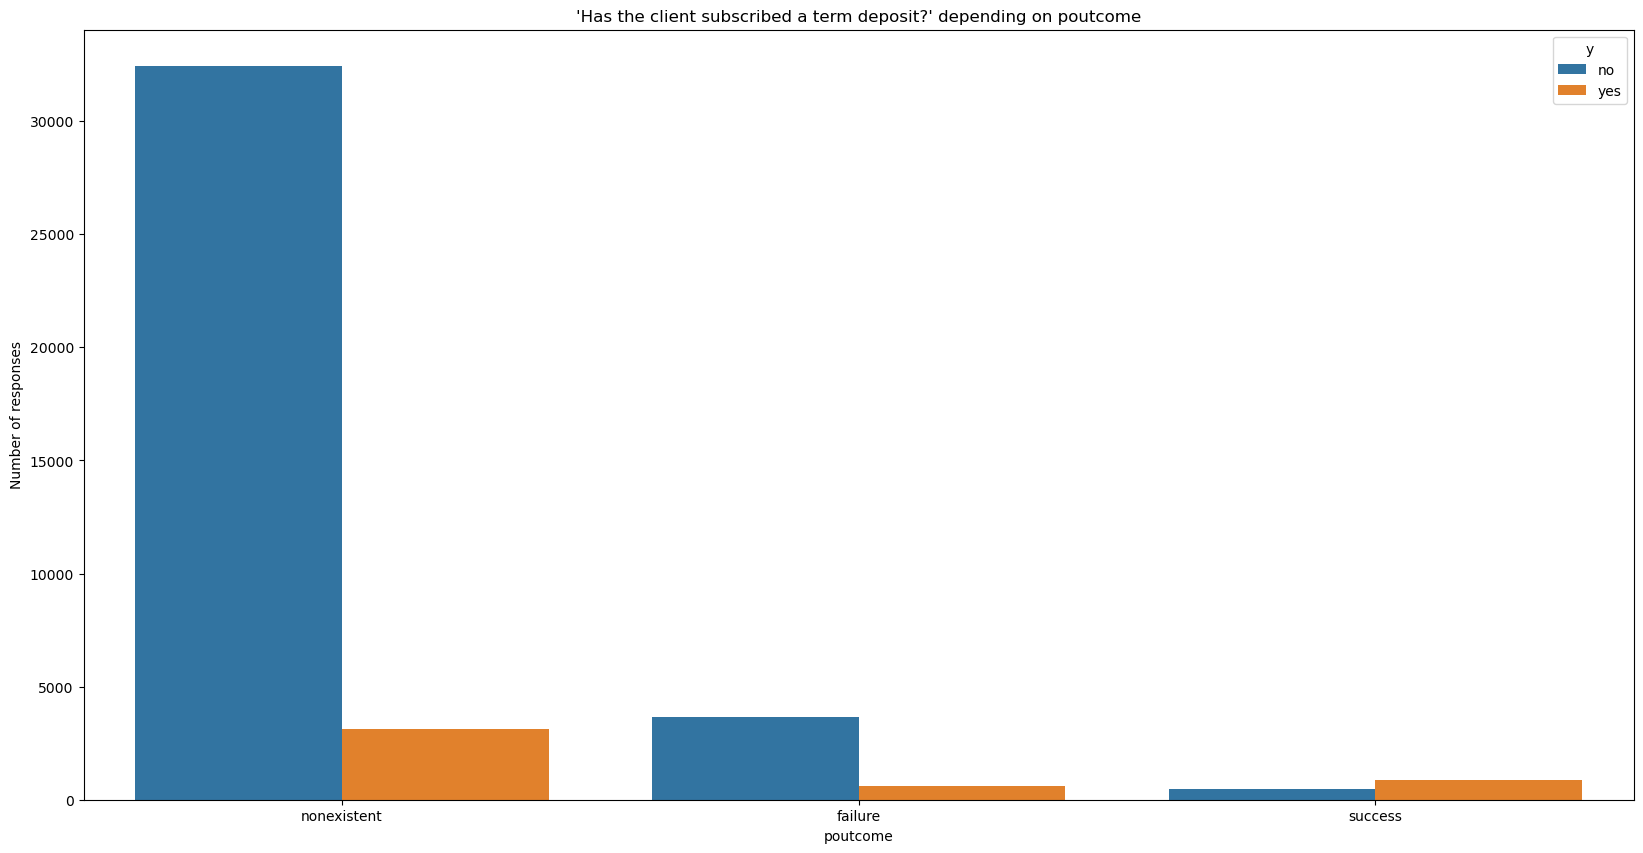

In [14]:
data_object_columns = bankMarketingCampaignDf.select_dtypes(include='object').columns.tolist()
data_object_columns.remove('y')
for column in data_object_columns:
    plt.figure(figsize=(20,10))
    sns.countplot(data=bankMarketingCampaignDf, x=bankMarketingCampaignDf[column], hue=bankMarketingCampaignDf['y'])
    plt.title("'Has the client subscribed a term deposit?' depending on " + column)
    plt.ylabel("Number of responses")
    plt.xlabel(column)
    plt.show()

In [15]:
bankMarketingCampaignDf['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [16]:
bankMarketingCampaignDf['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [17]:
bankMarketingCampaignDf['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

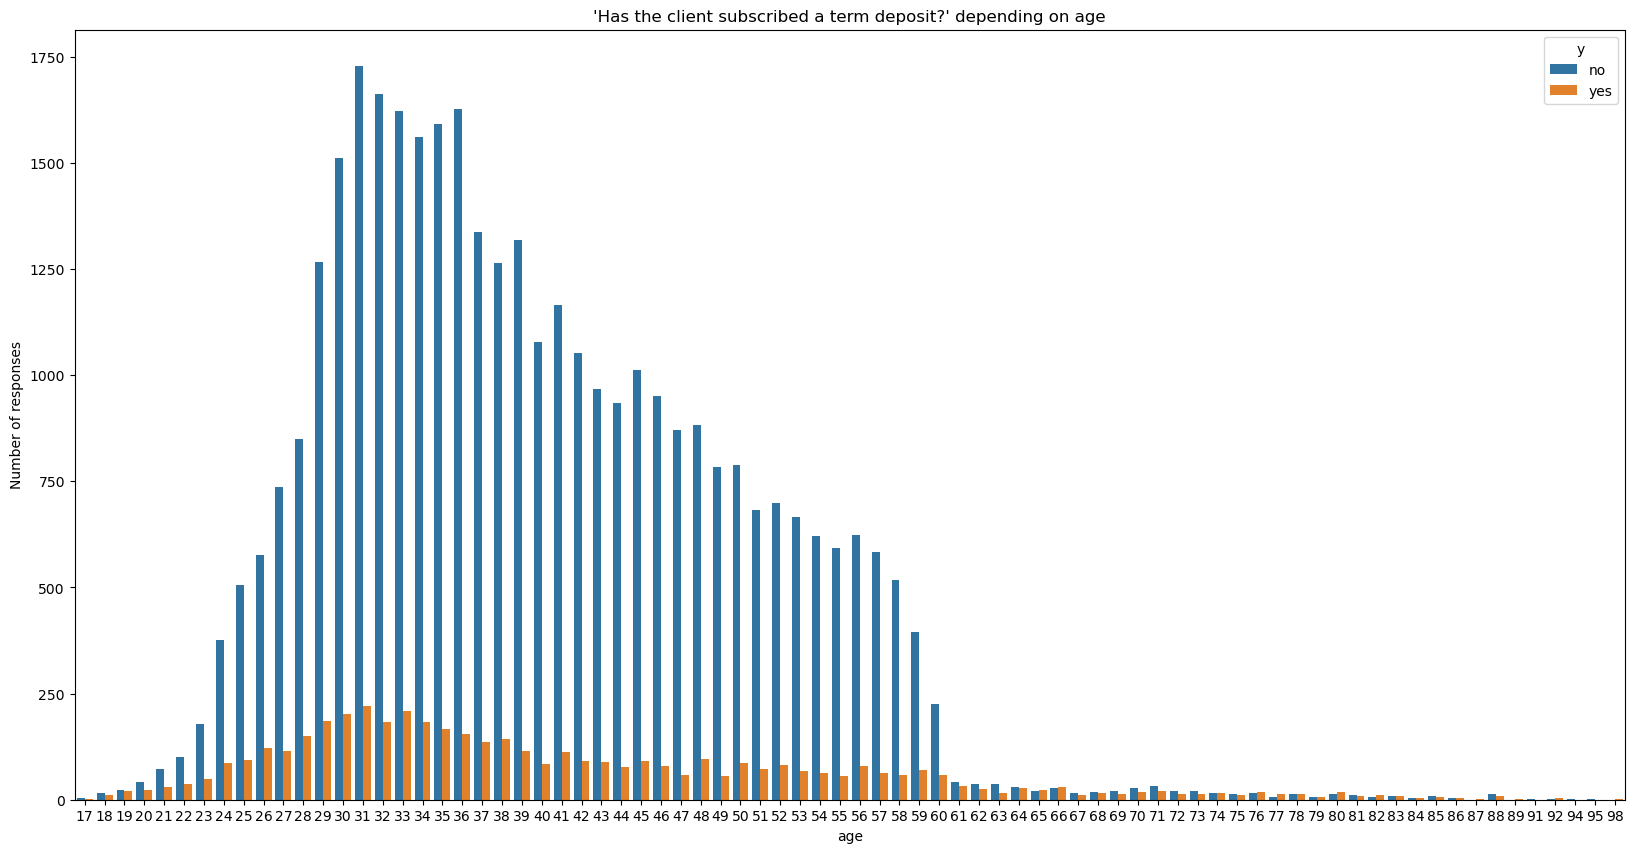

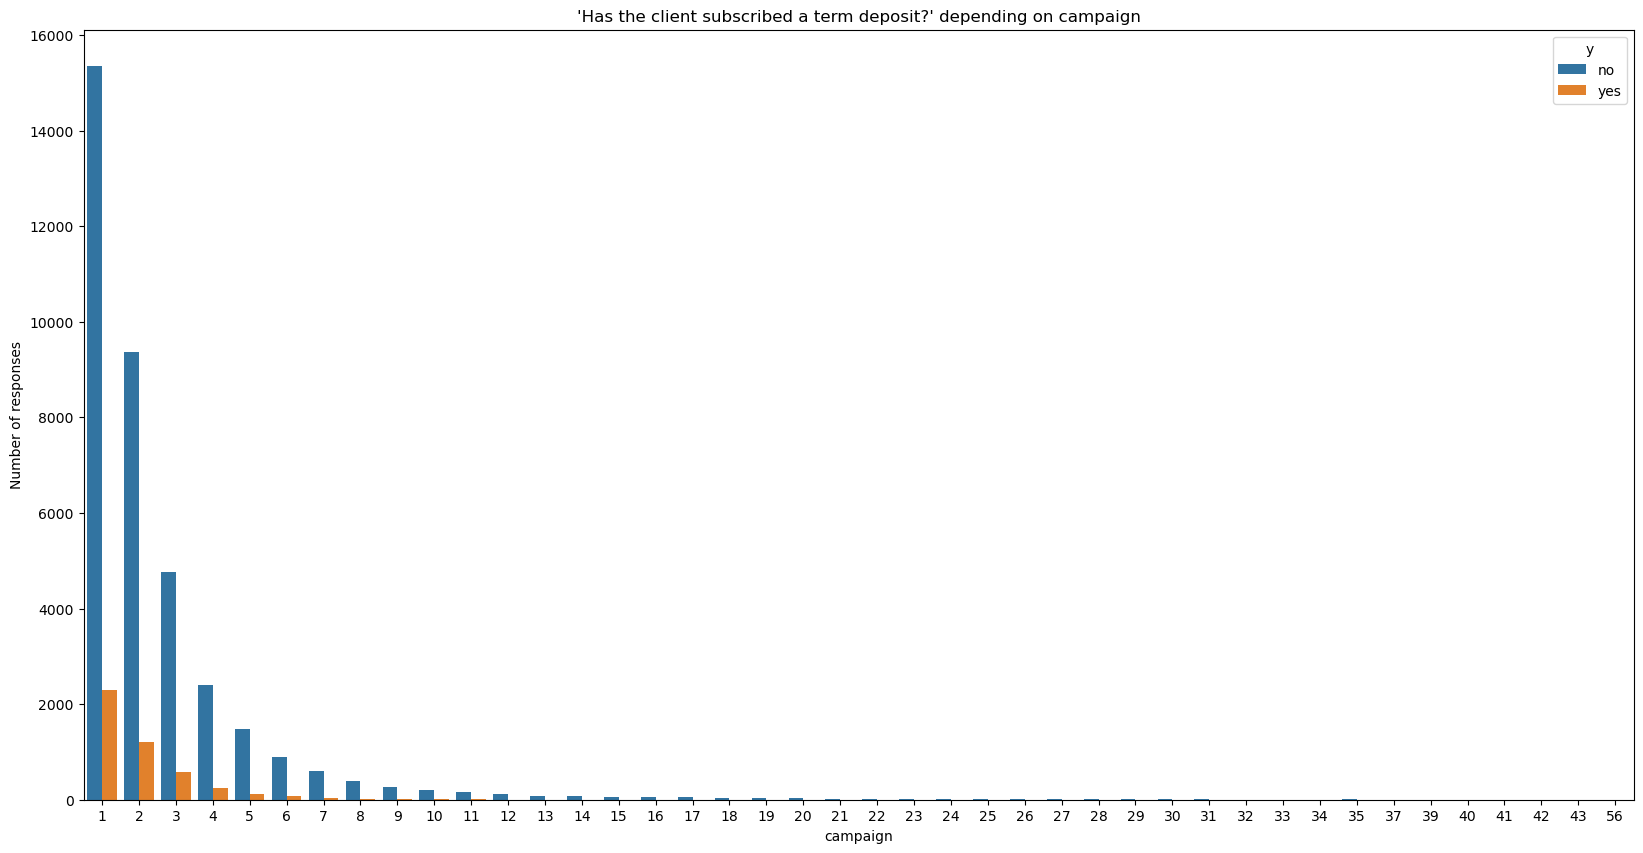

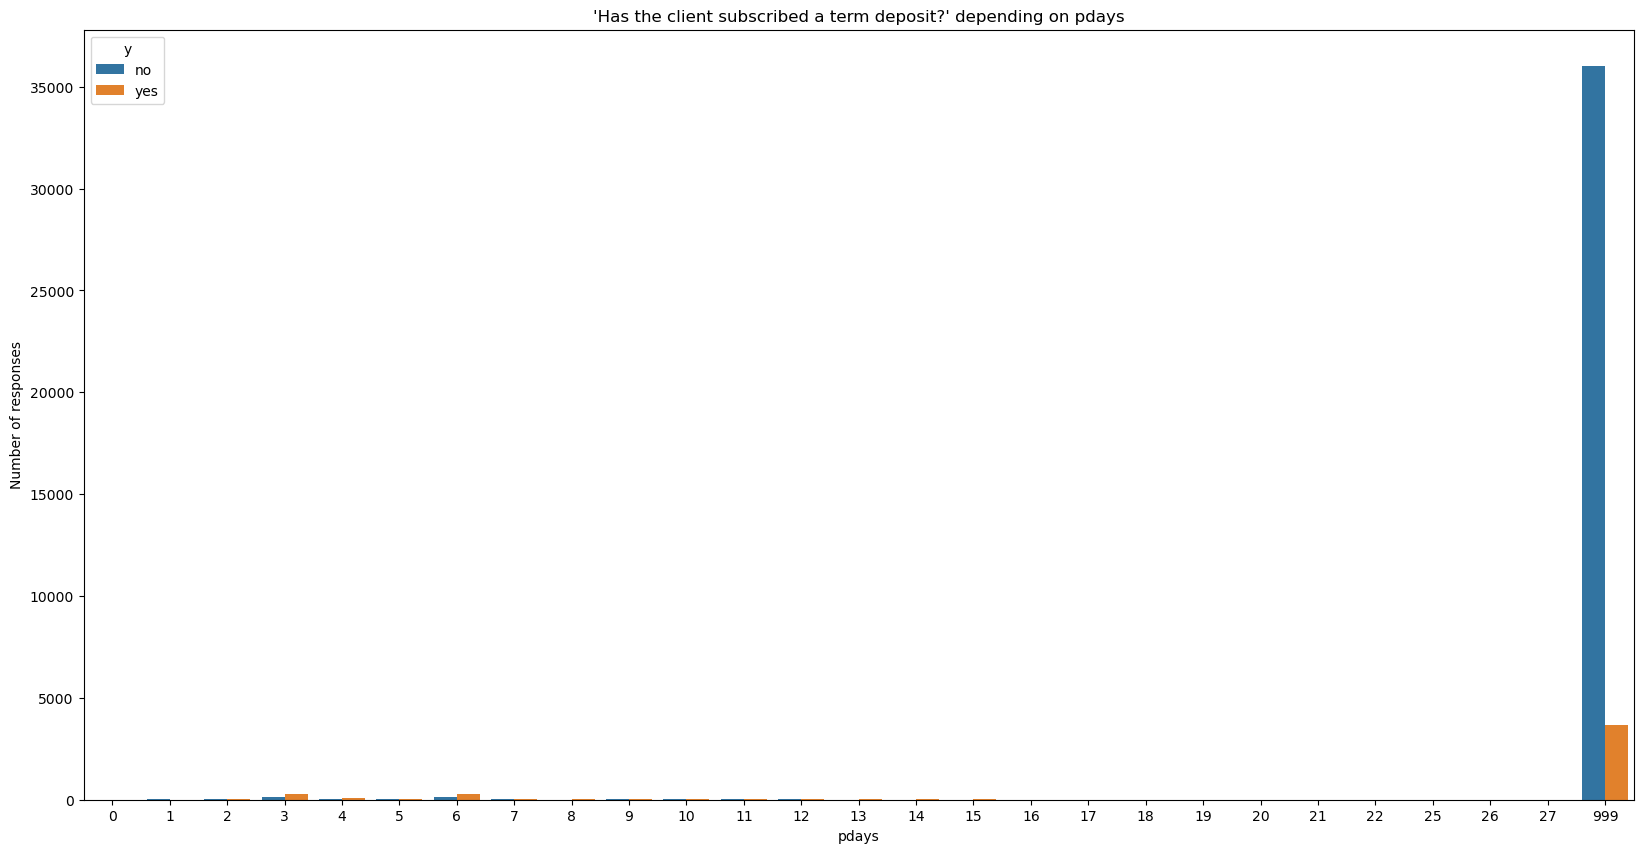

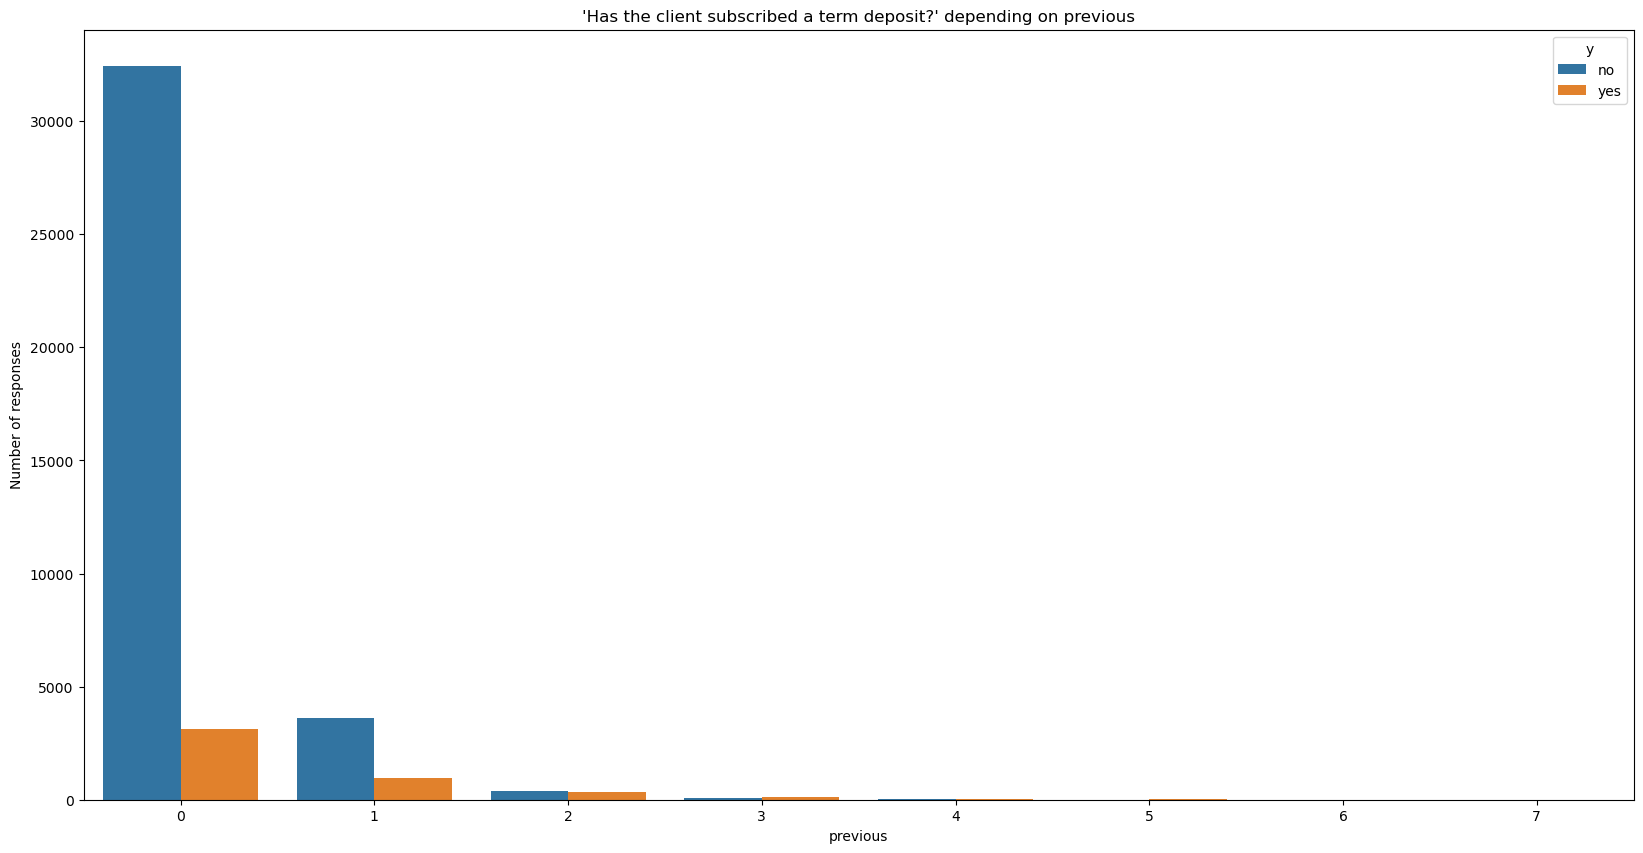

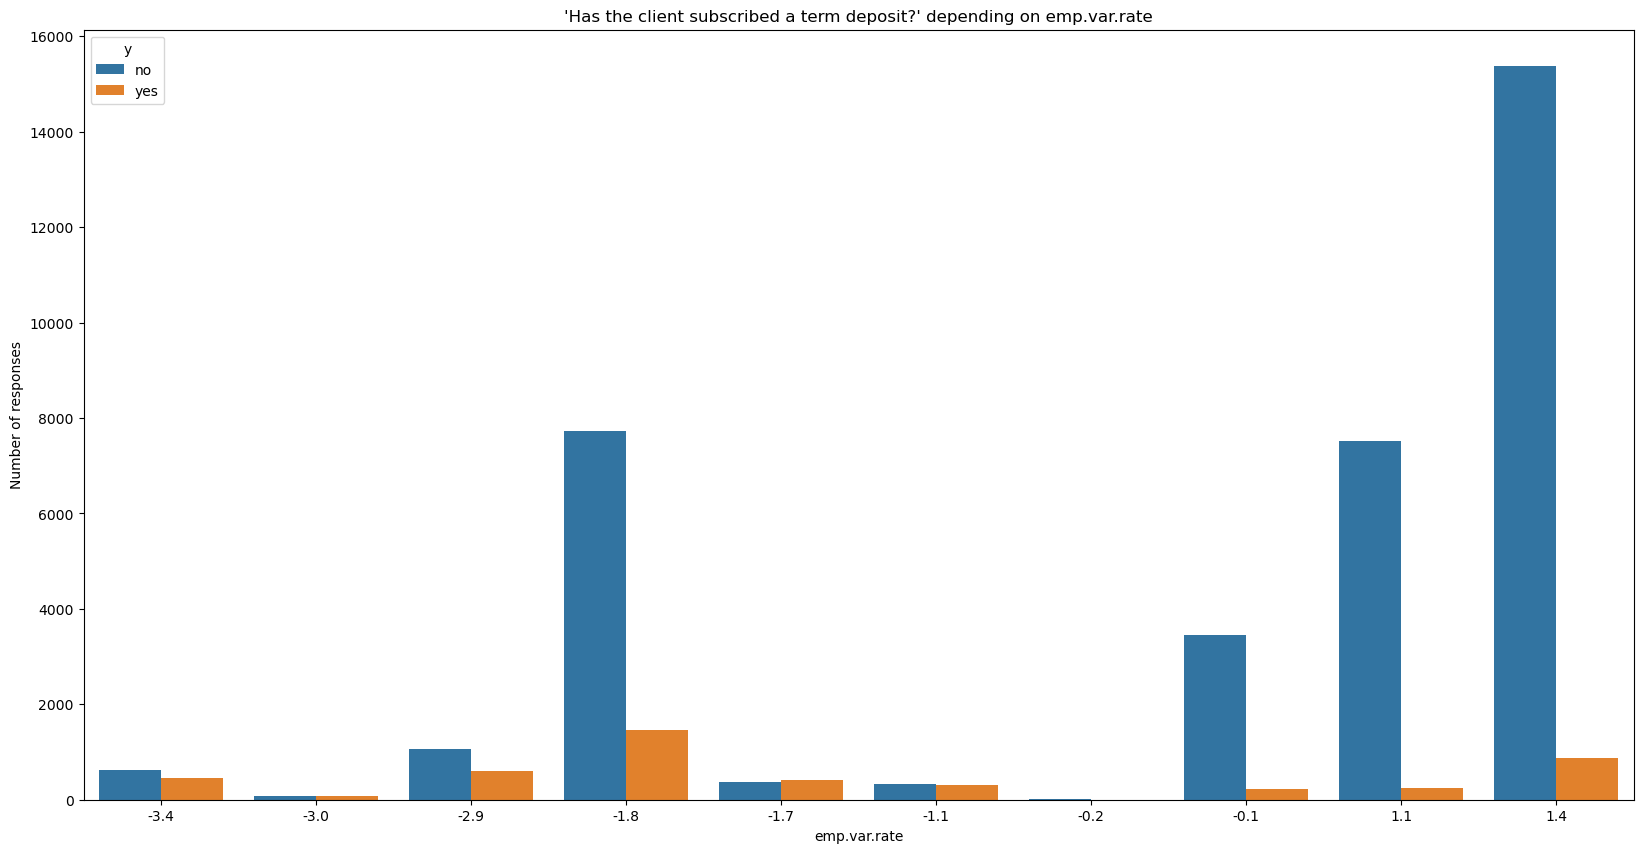

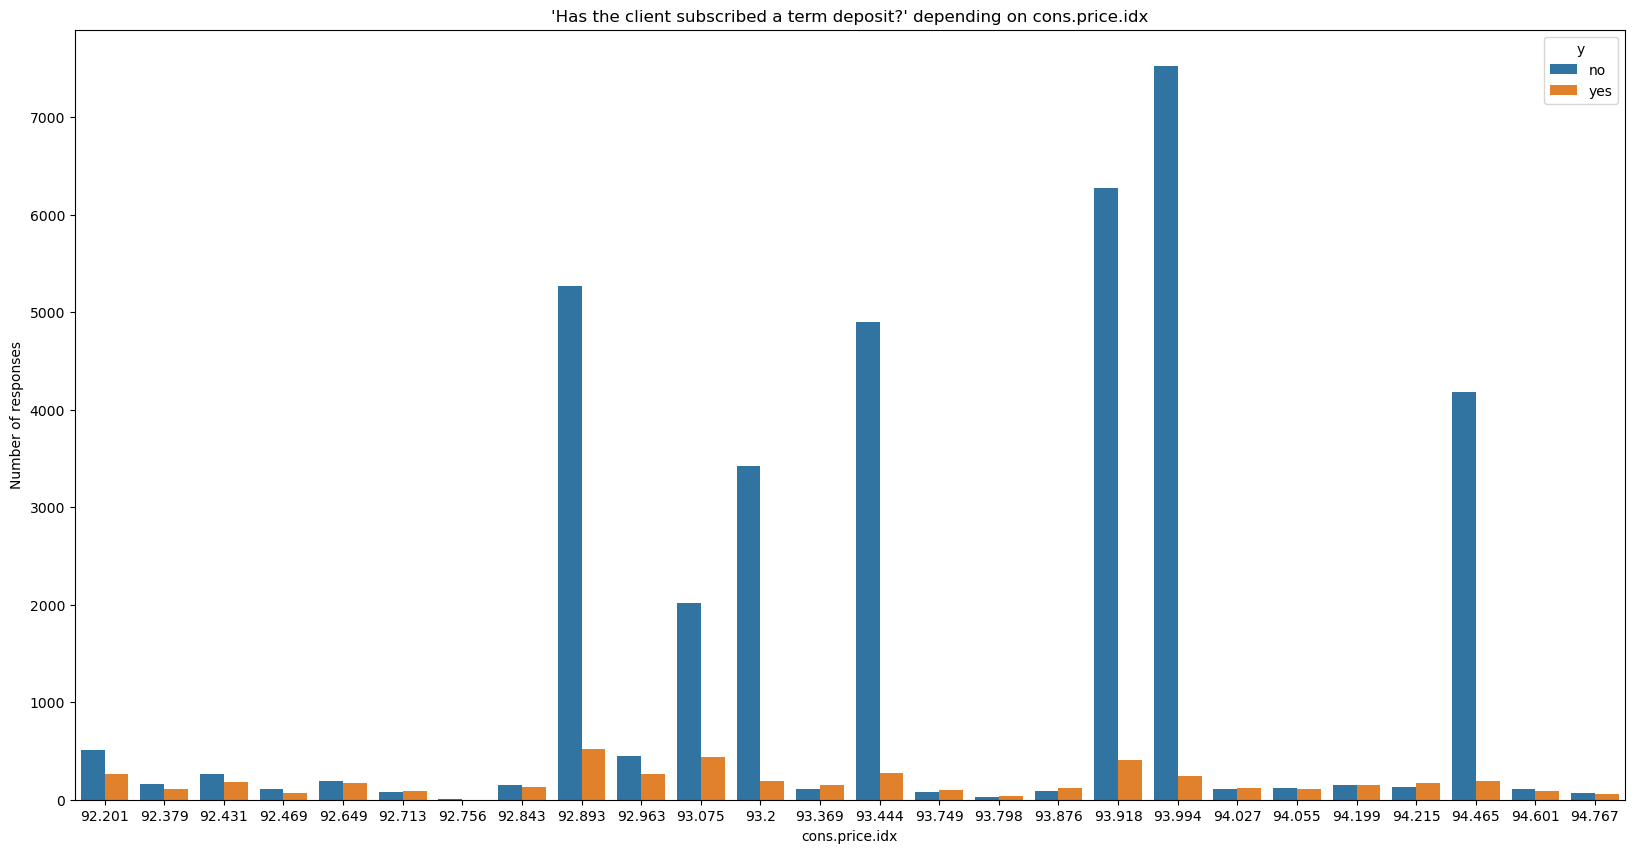

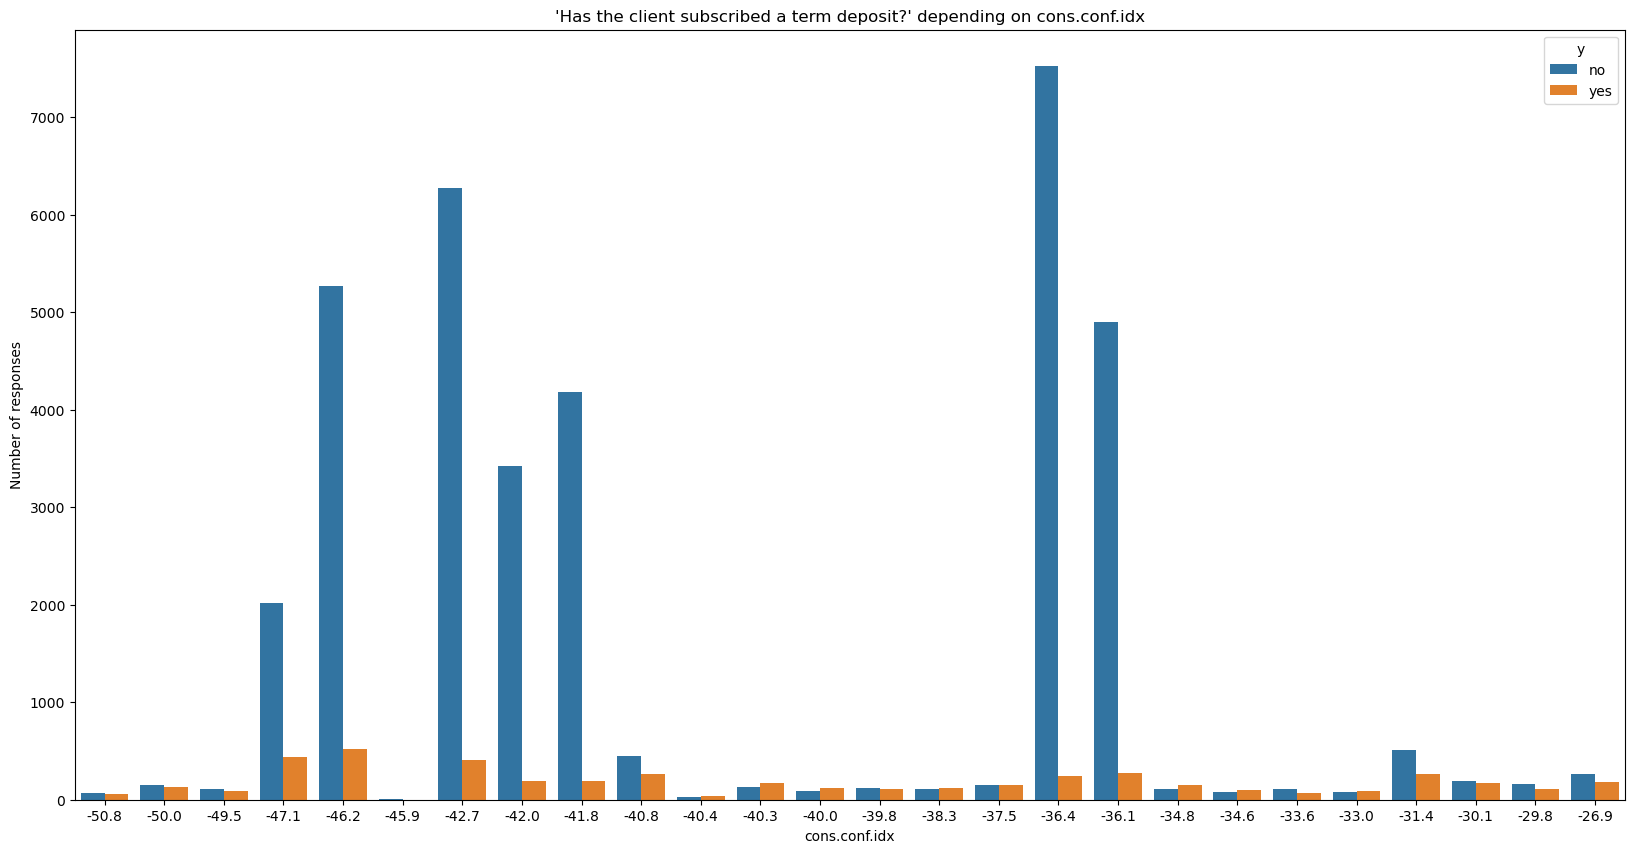

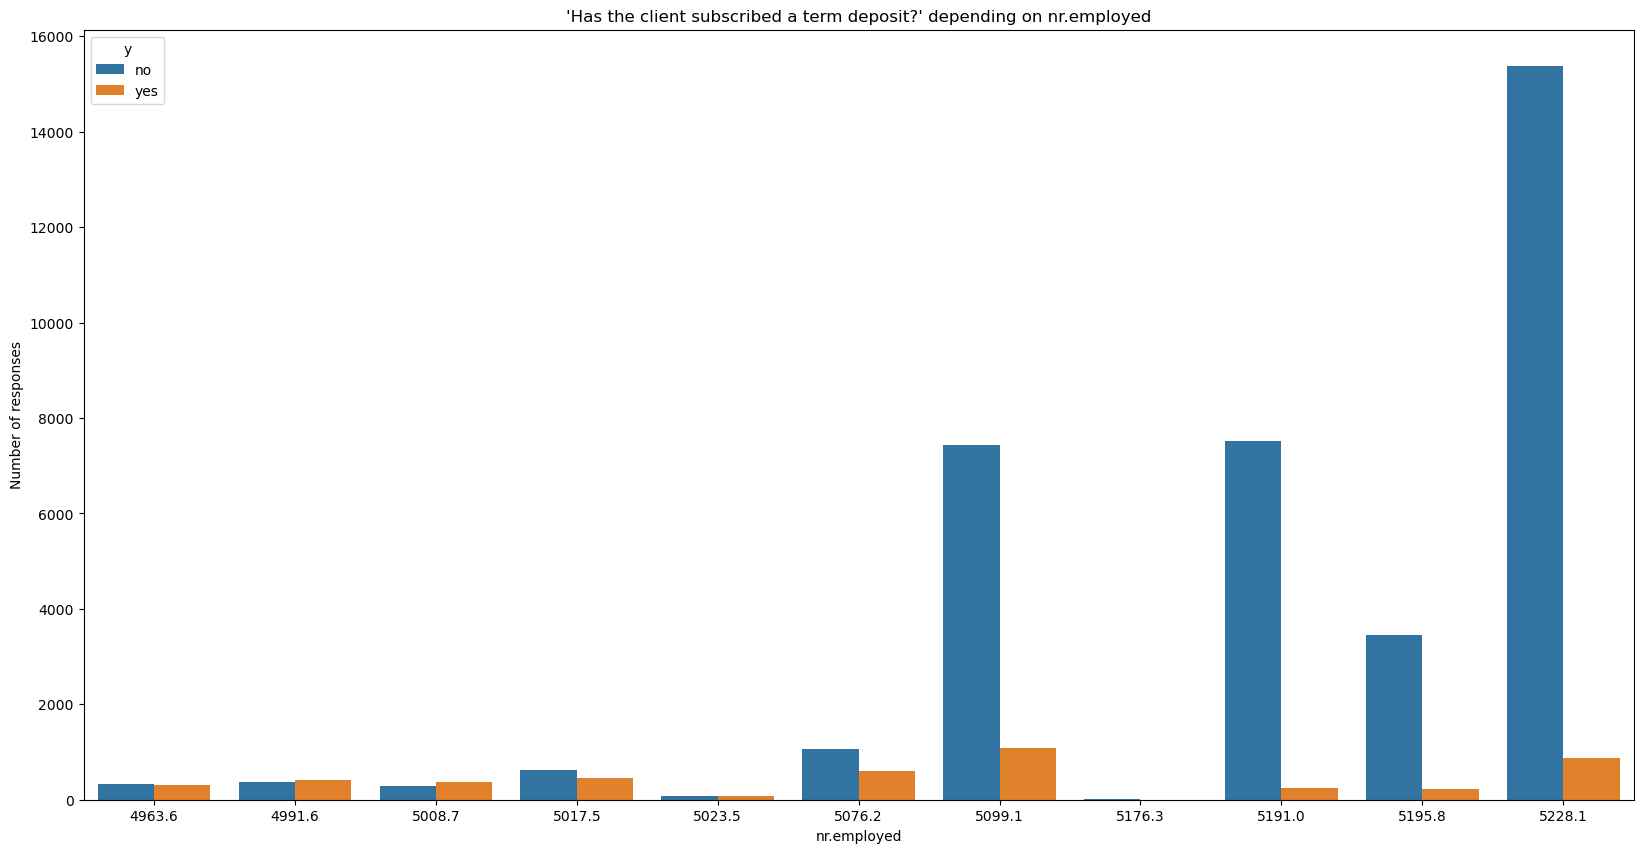

In [18]:
data_numeric_columns = bankMarketingCampaignDf.select_dtypes(include=['int64', 'float64']).columns.tolist()
data_numeric_columns.remove('duration')
data_numeric_columns.remove('euribor3m')
for column in data_numeric_columns:
    plt.figure(figsize=(20,10))
    sns.countplot(data=bankMarketingCampaignDf, x=bankMarketingCampaignDf[column], hue=bankMarketingCampaignDf['y'], hue_order=['no', 'yes'])
    plt.title("'Has the client subscribed a term deposit?' depending on " + column)
    plt.ylabel("Number of responses")
    plt.xlabel(column)
    plt.show()

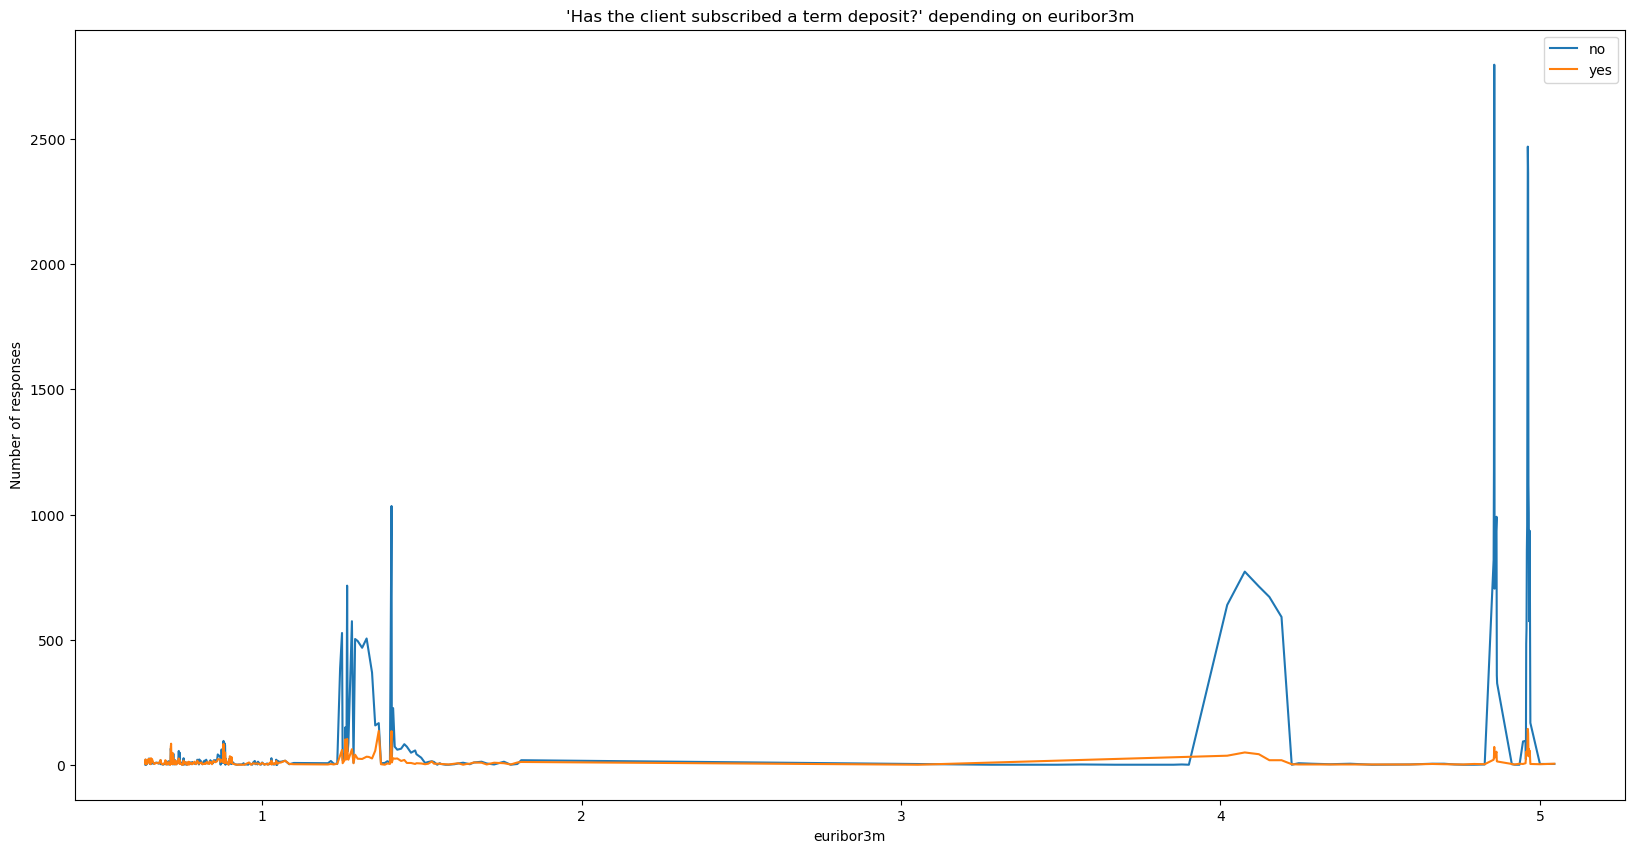

In [19]:
plt.figure(figsize=(20,10))
yesBankMarketingCampaignDf = bankMarketingCampaignDf[bankMarketingCampaignDf['y'] == 'yes'].groupby('euribor3m')['y'].count()
yesBankMarketingCampaignDf
noBankMarketingCampaignDf = bankMarketingCampaignDf[bankMarketingCampaignDf['y'] == 'no'].groupby('euribor3m')['y'].count()
sns.lineplot(data=noBankMarketingCampaignDf, label='no')
sns.lineplot(data=yesBankMarketingCampaignDf, label='yes')
plt.title("'Has the client subscribed a term deposit?' depending on euribor3m")
plt.ylabel("Number of responses")
plt.xlabel("euribor3m")
plt.show()

### Problem 4: Understanding the Task

**After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.**

In [21]:
bankMarketingCampaignDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The Business objective of creating a model to predict if the business telemarketing campaign will be effective on certain types of people, at some specific moment, in some specific social and economic context is to understand how to build the most efficient telemarketing campaign to have the best results possible.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [24]:
# We drop the duration column because it is an unpredictable column that would affect deeply our model
# We drop the column default since the values are nearly only no or unknown
# We drop the column pdays because most of the people have never been contacted before
# We drop the column poutcome because we want to know which profile of people are more incline to accept the telemarketing campaign offers
#   and this column focus more on the people that got targeted in the past and 85% were not so it sounds that business wise it's better to
#   drop this column
# We cleanup all the unknown data from the remaining columns
bankMarketingCampaignDf.drop(columns=['default', 'duration', 'pdays', 'poutcome'], inplace=True)
data_object_columns = bankMarketingCampaignDf.select_dtypes(include='object').columns.tolist()
for column in data_object_columns:
    if (len(bankMarketingCampaignDf[bankMarketingCampaignDf[column] == 'unknown']) > 0):
        bankMarketingCampaignDf.drop(bankMarketingCampaignDf[bankMarketingCampaignDf[column] == 'unknown'].index, inplace=True)
print("The dataset after cleanup has " + str(len(bankMarketingCampaignDf)) + " rows")

The dataset after cleanup has 38245 rows


In [25]:
bankMarketingCampaignDf = pd.get_dummies(bankMarketingCampaignDf, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week' ], drop_first=True, dtype='int64')

In [26]:
bankMarketingCampaignDf['y'] = bankMarketingCampaignDf['y'].replace({'no': 0, 'yes': 1}).astype('int64')

In [27]:
bankMarketingCampaignDf

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,1,0,0,0,0,0,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,...,0,0,0,1,0,0,0,0,0,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,1,0,0,0,0,0,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,1,0,0,0,0,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [29]:
X = bankMarketingCampaignDf.drop(columns='y')
y = bankMarketingCampaignDf['y']

In [30]:
# We split both datasets into 70%/30% to use the 70% for training and the 30% for the validation
X_train, X_test = train_test_split(X, random_state=42, test_size=0.3)
y_train, y_test = train_test_split(y, random_state=42, test_size=0.3)

In [31]:
print('Percentage of positive answers in training set: ' + str(len(y_train[y_train == 1]) / len(y_train)))
print('Percentage of positive answers in validation set: ' + str(len(y_test[y_test == 1]) / len(y_test)))

Percentage of positive answers in training set: 0.11071682044002838
Percentage of positive answers in validation set: 0.11277671256754401


### Problem 7: A Baseline Model

**Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?**

Considering the fact that most of the responses are negative (approximatively 89%), we want our responses to be able to classify properly at least 80% of the cases, especially that the objective is for a telemarketing campaign which stays a business case where the data are always gonna be impacted by the human behavior so they cannot be perfectly predicted. A very important parameter to consider will be to validate that the data is having positive results taking in consideration that it is an imbalanced dataset because considering this, only return negative answers would give us 89% results so it will be important to validate using balanced accuracy score.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticRegression', LogisticRegression())
])
lr_pipeline.fit(X_train, y_train)
lr_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticRegression', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [37]:
print('Score for training data: ' + str(balanced_accuracy_score(lr_pipeline.predict(X_train), y_train)))
print('Score for testing data: ' + str(balanced_accuracy_score(lr_pipeline.predict(X_test), y_test)))

Score for training data: 0.7518561776971504
Score for testing data: 0.7315628888652121


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [39]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]
results = []
for model in models:
    # Create a pipeline
    pipeline_model = Pipeline([
        ('scaler', StandardScaler()),
        (type(model).__name__, model)
    ])

    # Fit the model and time it
    start_time = time.time()
    pipeline_model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Evaluate on training and test sets
    train_score = balanced_accuracy_score(pipeline_model.predict(X_train), y_train)
    test_score = balanced_accuracy_score(pipeline_model.predict(X_test), y_test)
    
    # Append the results
    results.append([type(model).__name__, fit_time, train_score, test_score])
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression,0.157030,0.751856,0.731563
KNeighborsClassifier,0.013960,0.806036,0.702385
DecisionTreeClassifier,0.096592,0.996432,0.593680
SVC,14.165149,0.835897,0.746805


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [41]:
models_params = {
    'logisticregression' : (LogisticRegression(), {
        'logisticregression__C': [0.01, 0.1, 1, 10]
    }),
    'knn' : (KNeighborsClassifier(), {
        'knn__weights': ['uniform', 'distance'],
        'knn__n_neighbors': [1, 3, 5, 7, 10]
    }),
    'tree' : (DecisionTreeClassifier(), {
        'tree__criterion': ['gini', 'entropy', 'log_loss'],
        'tree__max_depth': [5, 10, 25, 50, 100]
    }),
    'svc' : (SVC(), {
        'svc__kernel': ['poly'],
        'svc__degree': [2, 3, 4]
    })
}

In [42]:
models = []
results = []
for model_name, (model, params) in models_params.items():
    pipeline_model = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    grid = GridSearchCV(pipeline_model, param_grid=params)
    start_time = time.time()
    grid.fit(X, y)
    fit_time = time.time() - start_time
    best_estimator = grid.best_estimator_
    train_score = balanced_accuracy_score(best_estimator.predict(X_train), y_train)
    test_score = balanced_accuracy_score(best_estimator.predict(X_test), y_test)
    print(best_estimator)
    models.append(best_estimator)
    results.append([type(model).__name__, fit_time, train_score, test_score])
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)
results_df

Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.01))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(max_depth=5))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(degree=2, kernel='poly'))])


,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression,1.764234,0.739638,0.756346
KNeighborsClassifier,12.410975,0.795983,0.806902
DecisionTreeClassifier,5.941408,0.759619,0.759741
SVC,473.320479,0.765964,0.780356


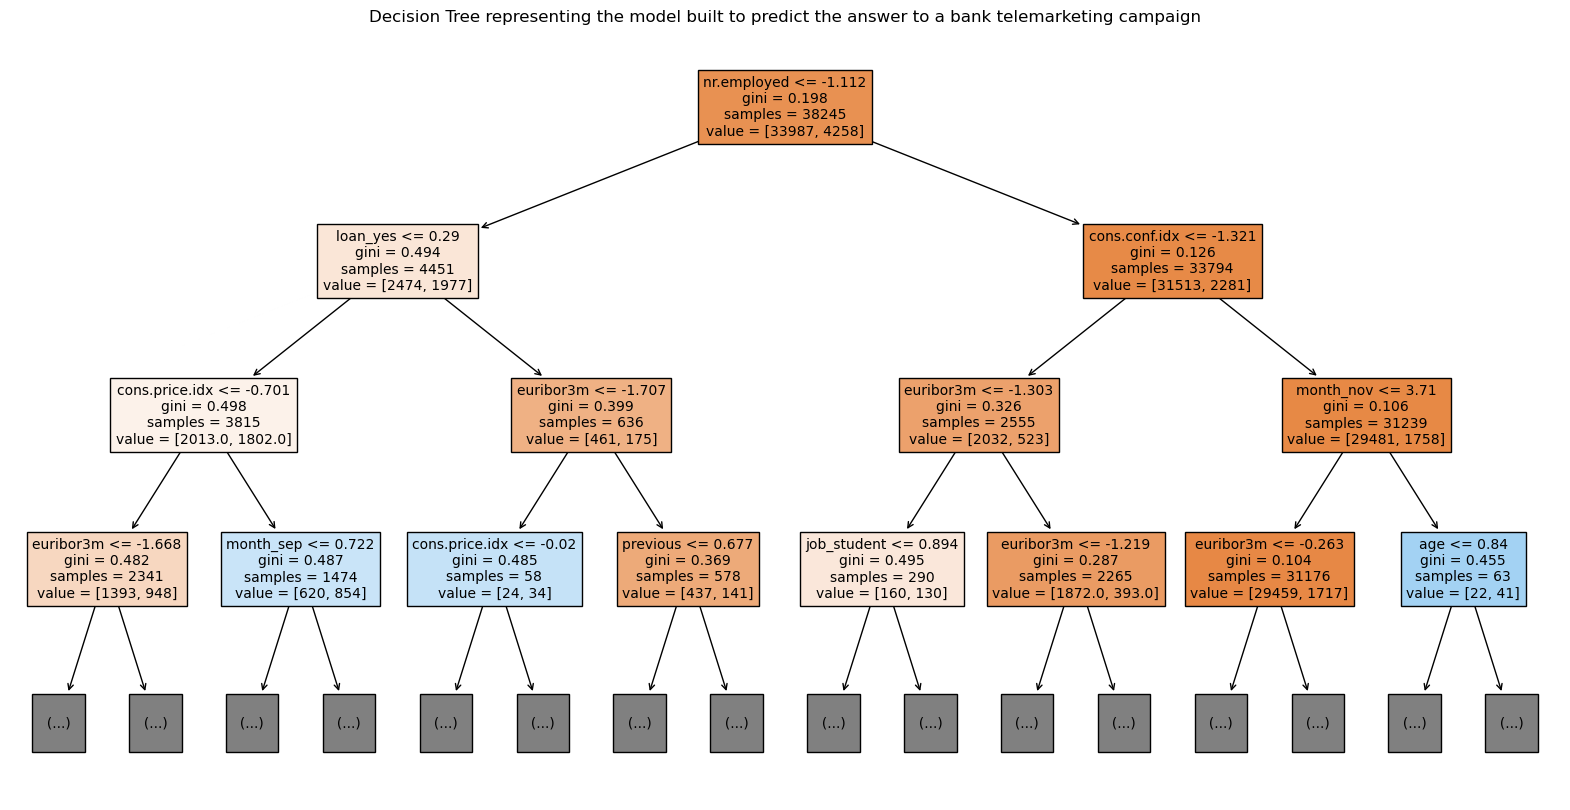

In [43]:
plt.figure(figsize=(20,10))
plot_tree(models[2].steps[1][1], feature_names=bankMarketingCampaignDf.columns, filled=True, fontsize=10, max_depth=3)
plt.title("Decision Tree representing the model built to predict the answer to a bank telemarketing campaign")
plt.show()

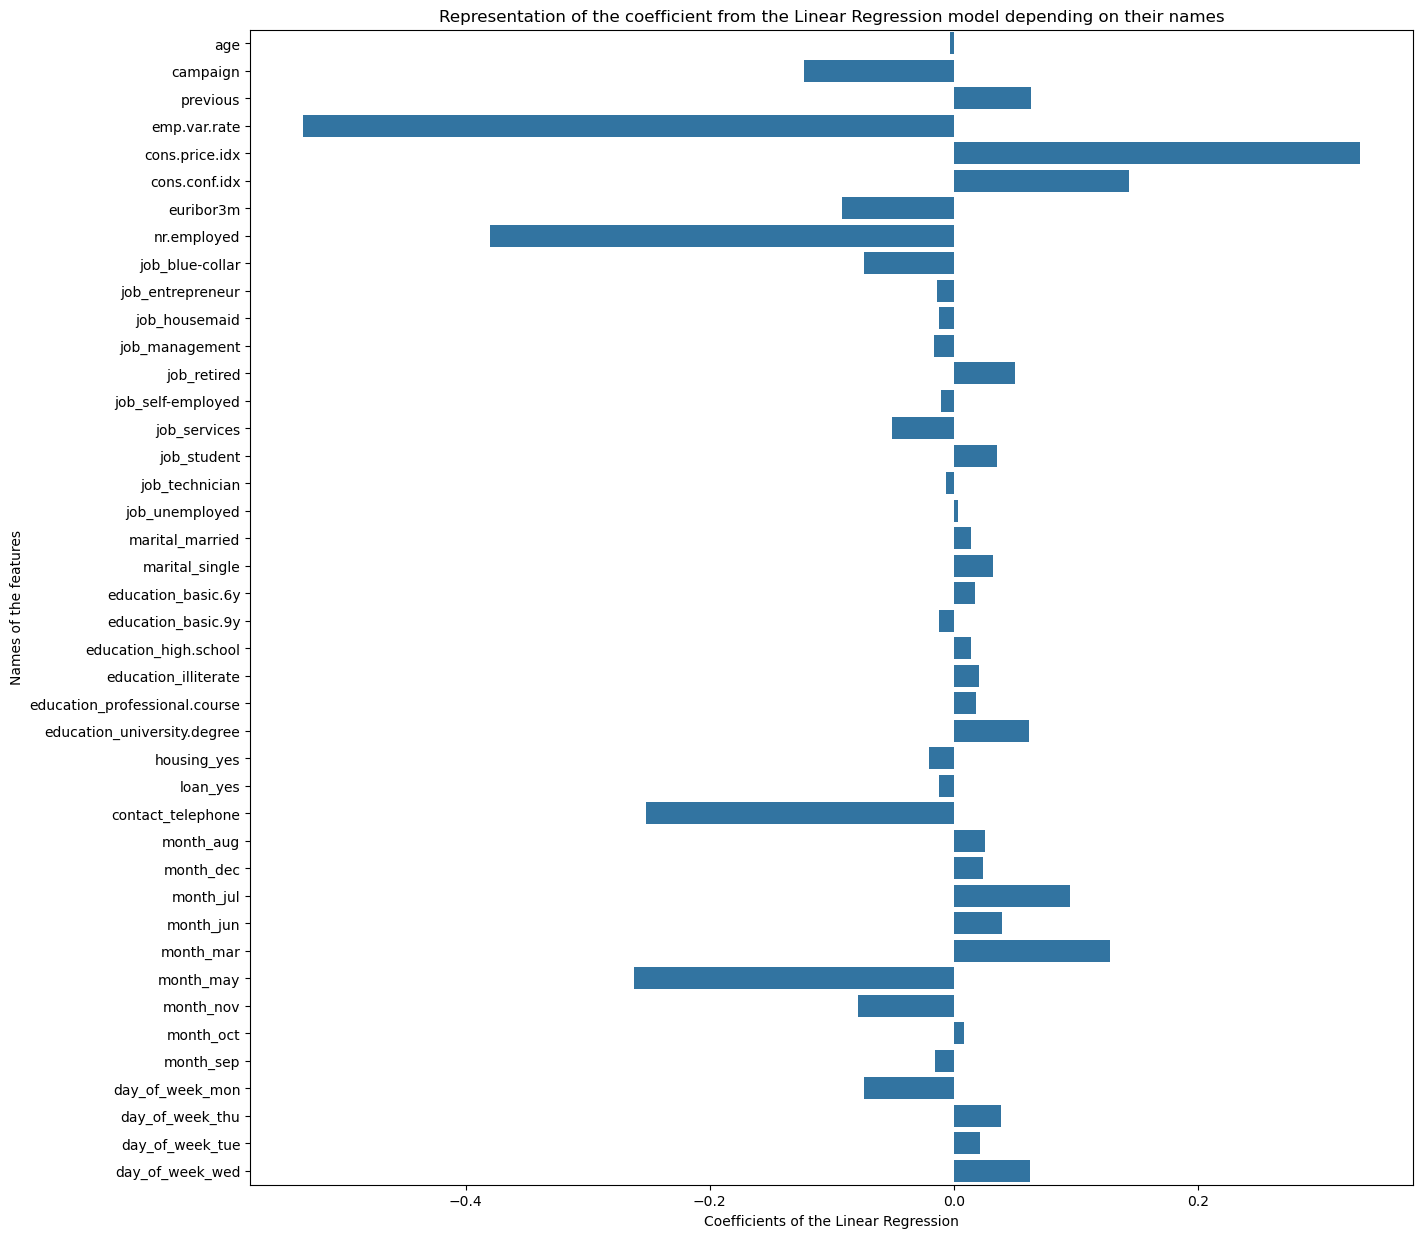

In [44]:
plt.figure(figsize=(15,15))
sns.barplot(x=models[0].steps[1][1].coef_.flatten(), y=X_train.columns)
plt.title("Representation of the coefficient from the Linear Regression model depending on their names")
plt.ylabel("Names of the features")
plt.xlabel("Coefficients of the Linear Regression")
plt.show()

The Success of Bank Telemarketing seem to be very related to the social and economic context attributes so we will test focusing on them and on the few other columns with a strong impact like `month` or `campaign` that we can see in the bar plot above.

In [46]:
bankMarketingCampaignDf = pd.read_csv('data/bank-additional-full.csv', sep = ';')
bankMarketingCampaignDf.info()
bankMarketingCampaignDf = bankMarketingCampaignDf[['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                                                  'nr.employed', 'month', 'y']]
data_object_columns = bankMarketingCampaignDf.select_dtypes(include='object').columns.tolist()
for column in data_object_columns:
    if (len(bankMarketingCampaignDf[bankMarketingCampaignDf[column] == 'unknown']) > 0):
        bankMarketingCampaignDf.drop(bankMarketingCampaignDf[bankMarketingCampaignDf[column] == 'unknown'].index, inplace=True)
bankMarketingCampaignDf = pd.get_dummies(bankMarketingCampaignDf, columns=['month' ], drop_first=True, dtype='int64')
bankMarketingCampaignDf['y'] = bankMarketingCampaignDf['y'].replace({'no': 0, 'yes': 1}).astype('int64')
X = bankMarketingCampaignDf.drop(columns='y')
y = bankMarketingCampaignDf['y']
X_train, X_test = train_test_split(X, random_state=42, test_size=0.3)
y_train, y_test = train_test_split(y, random_state=42, test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [47]:
results = []
for model_name, (model, params) in models_params.items():
    pipeline_model = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    grid = GridSearchCV(pipeline_model, param_grid=params)
    start_time = time.time()
    grid.fit(X, y)
    fit_time = time.time() - start_time
    best_estimator = grid.best_estimator_
    train_score = balanced_accuracy_score(best_estimator.predict(X_train), y_train)
    test_score = balanced_accuracy_score(best_estimator.predict(X_test), y_test)
    print(best_estimator)
    results.append([type(model).__name__, fit_time, train_score, test_score])
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)
results_df

Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.01))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(max_depth=5))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(degree=2, kernel='poly'))])


,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression,1.156401,0.723224,0.724371
KNeighborsClassifier,10.970583,0.777833,0.790346
DecisionTreeClassifier,1.839257,0.741426,0.749571
SVC,205.240995,0.733650,0.748259


### Conclusion

We have been able to build some models that had results above 80% but even more interestingly, after some researches we have been able to build new models with a lot less columns of data so the learning have been a lot faster but with similar results (just a little lower) so it proves us that these features are crucial to determine if people are gonna be receptive to the telemarketing campaign. Our results shows us that a good month to execute the telemarketing campaign could be July or March but more importantly, it will be very crucial to take in consideration the social and economic context because all the fields are impacting deeply the results of the marketing campaign, on the other hand it seems that there are no specific profiles of people answering positively to the marketing campaign.